#  PART 1

* What are the input text parameters?

* What are the labels? :
   
   * Gender 
   * Age 
   * Industry 
   * Astrological Sign
   
###### MemoryError: Unable to allocate 468. MiB for an array with shape (204386, 300) and data type float64

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [2]:
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.model_selection import train_test_split

##### DATA EXPLORATION

In [3]:
data = pd.read_csv('blogtext.csv')

In [4]:
data.shape

(681284, 7)

In [5]:
pd.options.display.max_colwidth = 200
data.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An ...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate ins...


Here, given the problem is typically a classification one. It shouldn't make any sense to predict date and id as it's does not describe any potentially important aspect of any text. 

In [6]:
data.drop(columns = ['id','date'], axis = 0, inplace = True)
data.head(5)

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
1,male,15,Student,Leo,These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail
2,male,15,Student,Leo,In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An ...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate ins...


###### EXPLORING DATA STATISTICS 

In [7]:
data[['gender','age','topic','sign']].dtypes

gender    object
age        int64
topic     object
sign      object
dtype: object

In [8]:
print(sorted(data['age'].unique()), ', data type: ',data['age'].dtype)


[13, 14, 15, 16, 17, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48] , data type:  int64


In [9]:
data['age'] = ['10s' if ((type(i)==int)&(i in range(0,18))) else i for i in data['age'] ]
data['age'] = ['20s' if ((type(i)==int)&(i in range(23,28))) else i for i in data['age'] ]
data['age'] = ['30s' if ((type(i)==int)&(i in range(33,49))) else i for i in data['age'] ]

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

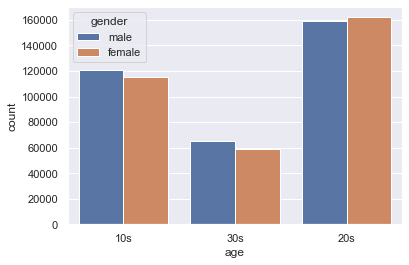

In [10]:
sns.countplot(data['age'], hue =data['gender'])

<AxesSubplot:xlabel='sign', ylabel='topic'>

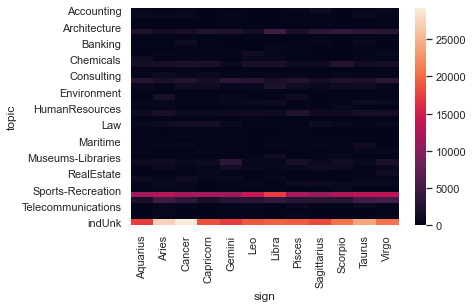

In [11]:
cross_tab = pd.crosstab(data['topic'],data['sign'])
sns.heatmap(cross_tab)

Here it appears as though aries and cancer people have greater interesting in writing on "indUnk" than people with other zodiac signs. 

However there's no particular pattern to learn from the above map since the two topics largely written on are Sports-Recreation and Unknown Industry by people of all signs. So all the said points makes it safe to discard Sign. 

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sign', ylabel='count'>

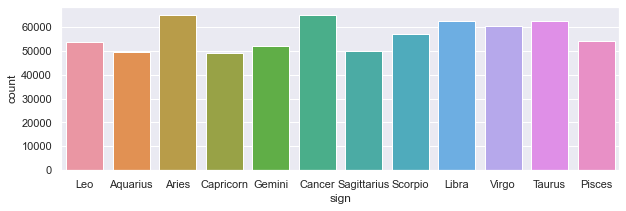

In [12]:
plt.figure(figsize = (10,3))
sns.countplot(data['sign'])

But from above it's clear that people with signs Aries and Cancer are simply greater in number than people with other signs. 

<AxesSubplot:xlabel='age', ylabel='gender'>

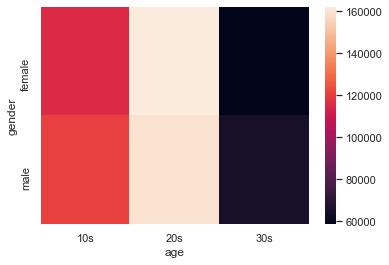

In [13]:
cross_tab = pd.crosstab(data['gender'],data['age'])
sns.heatmap(cross_tab)

By and large, males and females write equally in numbers. 

<AxesSubplot:xlabel='gender', ylabel='topic'>

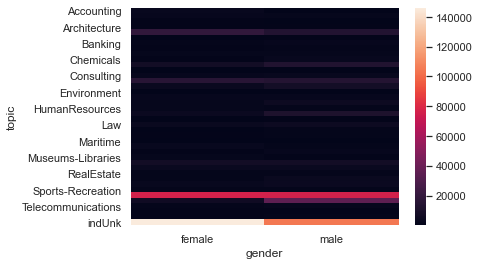

In [14]:
cross_tab = pd.crosstab(data['topic'],data['gender'])
sns.heatmap(cross_tab)

Given, the counts of male and female bloggers are equal in numbers, it can be derived that females truly write more articles on indUnk that males. Males seem to write more on Telecommunications. 

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


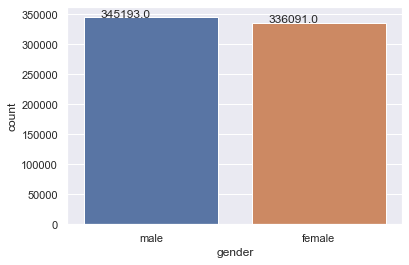

In [15]:
ax = sns.countplot(data['gender'])

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

###### Since the problem is typically a multilabel classification problem, it is widely advised that the labels are merged to unique collections of labels in the context of NLP problems at least. 

In [16]:
data['age'].unique()

array(['10s', '30s', '20s'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='sign'>

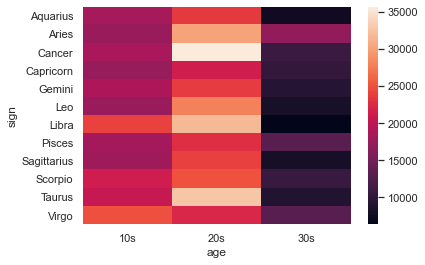

In [17]:
cross_tab = pd.crosstab(data['sign'],data['age'])
sns.heatmap(cross_tab)

<AxesSubplot:xlabel='age', ylabel='topic'>

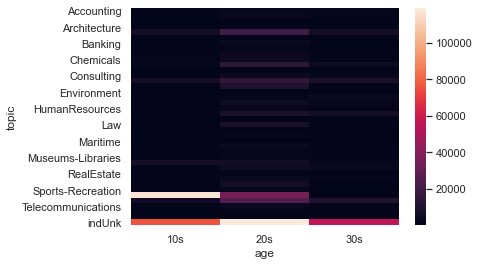

In [18]:
cross_tab = pd.crosstab(data['topic'],data['age'])
sns.heatmap(cross_tab)

So from all the plots and maps, it's easily inferable that age tends to have a pattern against other variables. Hence to make the prediction output simpler, it should be a preemptive move to eliminate all that 'Age' follows a pattern with. 

In [19]:
data.drop(columns = ['gender','topic','sign'],axis = 0, inplace = True)

In [20]:
data.head(5)

,age,text
0,10s,"Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
1,10s,These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail
2,10s,In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An ...
3,10s,testing!!! testing!!!
4,30s,Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate ins...


###### Tokenization 

In [21]:
def tokenizer(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

###### Preparing Word Embeddings for Potential Words

In [22]:
embeddings_index = {}
f = open('glove.6B.300d.txt',encoding="utf8")
embeddings_index['<unk>'] = 0
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [23]:
word_data = list()
for words in data['text']:
    sentence = np.zeros(300)
    count = 0
    for w in tokenizer(words):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    word_data.append(sentence / count)

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Here, the word embedding for each word in each sentence in the dataset is normalized by the wordcount and append to form back the respective sentences in the embedded data array. 

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['age'])
data['target'] = le.transform(data['age'])

In [25]:
data.head()

,age,text,target
0,10s,"Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.",0
1,10s,These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail,0
2,10s,In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An ...,0
3,10s,testing!!! testing!!!,0
4,30s,Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate ins...,2


In [26]:
x = np.array(word_data)
y = data.target

In [27]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [28]:
print(f'x train shape : {x_tr.shape}\n\nx test shape : {x_te.shape}\n\ny train shape : {y_tr.shape}\n\ny test shape : {y_te.shape}')

x train shape : (579091, 300)

x test shape : (102193, 300)

y train shape : (579091,)

y test shape : (102193,)


###### Since the output is in the form of lists which can not be easily/ accurately rebuilt using prediction, we need to convert the output data to an appropriate format. 

In [29]:
# label_counts=dict()

# for labels in data.labels.values:
#     for label in labels:
#         if label in label_counts:
#             label_counts[str(label)]+=1
#         else:
#             label_counts[str(label)]=1

In [30]:
# from sklearn.preprocessing import MultiLabelBinarizer
# binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [31]:
# y_tr = binarizer.fit_transform(y_tr)
# y_te = binarizer.fit_transform(y_te)

In [32]:
# y_tr

In [33]:
# unique_rows = np.unique(y_tr, axis=0)

In [34]:
# len(unique_rows)

In [35]:
x_tr = np.nan_to_num(x_tr)
x_te = np.nan_to_num(x_te)

This step is to fill in for the empty spots in the arrays. 

In [1]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(x_tr,y_tr)
pr = clf.predict(x_te)
print(accuracy_score(y_te, pr))

0.4609806933938724


In [40]:
lr = LogisticRegression(solver = 'liblinear',max_iter=1000)
lr.fit(x_tr,y_tr)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 solver='liblinear'))

In [41]:
pr = lr.predict(x_te)
print(accuracy_score(y_te, pr))

0.5811259088195865


Logistic Regression seems to perform better than BernoullieNB. 

In [42]:
lr = LogisticRegression(solver = 'liblinear',max_iter=3000)
lr.fit(x_tr,y_tr)
pr = lr.predict(x_te)
print(accuracy_score(y_te, pr))

0.5811063380074957


Increasing the iterations does not improve the fit at all. 

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
def fit_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics 
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    score = round(model.score(x_test,y_test),3)

    
    return score
    

In [50]:
def bag_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train,y_train)
    bgcl = BaggingClassifier(base_estimator=model, n_estimators=7, random_state=1)
    bgcl.fit(x_train,y_train)
    pred = bgcl.predict(x_test)
    score = bgcl.score(x_test,y_test)    

    
    return score 

In [104]:
def boost_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train,y_train)
    abcl = AdaBoostClassifier(base_estimator = model,n_estimators=50,random_state=1,algorithm='SAMME')
    
    #[Discrete SAMME AdaBoost adapts based on errors in predicted class labels whereas real SAMME.R uses
    #the predicted class probabilities.]
    
    abcl = abcl.fit(x_train,y_train)
    pred = abcl.predict(x_test)
    score = abcl.score(x_test,y_test)
    

    
    return score

In [48]:
lr_result = pd.DataFrame({'Model':['lr_original'],
                       'Accuracy':[0.5811063380074957]})

In [49]:
lr_result

,Model,Accuracy
0,lr_original,0.581106


In [51]:
lr = LogisticRegression(solver = 'liblinear',max_iter=200)


In [52]:
lr_accuracy = bag_n_print(lr,x_tr,x_te,y_tr,y_te)

In [53]:
lr_accuracy

0.5817326039944027

In [54]:
temp_result = pd.DataFrame({'Model':['lr_bag'],
                       'Accuracy':[lr_accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733


In [55]:
lr_accuracy = boost_n_print(lr,x_tr,x_te,y_tr,y_te)

In [56]:
lr_accuracy

0.4701006918282074

In [57]:
temp_result = pd.DataFrame({'Model':['lr_boost'],
                       'Accuracy':[lr_accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101


###### Bagging and Boosting seems to bring no improvement either. 

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
knn = KNeighborsClassifier()

In [61]:
lr_accuracy = fit_n_print(knn,x_tr,x_te,y_tr,y_te)
lr_accuracy
temp_result = pd.DataFrame({'Model':['knn'],
                       'Accuracy':[lr_accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000


In [63]:
def bag_n_print(model,x_train,x_test,y_train,y_test, n_est):
    from sklearn import metrics
    model.fit(x_train,y_train)
    bgcl = BaggingClassifier(base_estimator=model, n_estimators=n_est, random_state=1)
    bgcl.fit(x_train,y_train)
    pred = bgcl.predict(x_test)
    score = bgcl.score(x_test,y_test)    

    
    return score 

In [69]:
svm = SVC(gamma='auto', kernel = 'poly', degree = 3, max_iter = 1000)
accuracy = fit_n_print(svm,x_tr,x_te,y_tr,y_te) 

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [70]:
accuracy

0.183

In [71]:
temp_result = pd.DataFrame({'Model':['svm'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000


###### KNN and SVM also do fit poorly on the data. 

In [72]:
svm = SVC(gamma='auto', kernel = 'poly', degree = 3, max_iter = 1000)
accuracy = bag_n_print(svm,x_tr,x_te,y_tr,y_te,7) 

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, 

In [74]:
temp_result = pd.DataFrame({'Model':['svm_bag'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715


##### Bagging and Boosting  have not helped improve the fit on any classification algorithm so far.

In [75]:
svm = SVC(gamma='auto', kernel = 'poly', degree = 3, max_iter = 1000)
accuracy = boost_n_print(svm,x_tr,x_te,y_tr,y_te)

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


ValueError: BaseClassifier in AdaBoostClassifier ensemble is worse than random, ensemble can not be fit.

In [76]:
from sklearn.linear_model import SGDClassifier

In [85]:
sgdc = SGDClassifier(max_iter = 9800, learning_rate = 'constant', eta0 = 0.01)
sgdc.fit(x_tr, y_tr)

SGDClassifier(eta0=0.01, learning_rate='constant', max_iter=9800)

In [86]:
score = sgdc.score(x_te,y_te)
score

0.568209172839627

In [87]:
temp_result = pd.DataFrame({'Model':['SGDC'],
                       'Accuracy':[score]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209


In [88]:
accuracy = bag_n_print(sgdc,x_tr,x_te,y_tr,y_te,20) 

In [90]:
temp_result = pd.DataFrame({'Model':['SGDC_boost'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209
0,SGDC_boost,0.580715


In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [92]:
nb = GaussianNB()
accuracy = fit_n_print(sgdc,x_tr,x_te,y_tr,y_te)

In [94]:
temp_result = pd.DataFrame({'Model':['Naive Bayes'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209
0,SGDC_boost,0.580715
0,Naive Bayes,0.571000


In [96]:
accuracy = bag_n_print(nb,x_tr,x_te,y_tr,y_te,50)

In [98]:
temp_result = pd.DataFrame({'Model':['Naive Bayes_bag'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209
0,SGDC_boost,0.580715
0,Naive Bayes,0.571000
0,Naive Bayes_bag,0.468829


In [105]:
accuracy = boost_n_print(nb,x_tr,x_te,y_tr,y_te)

In [107]:
temp_result = pd.DataFrame({'Model':['Naive Bayes_boost'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209
0,SGDC_boost,0.580715
0,Naive Bayes,0.571000
0,Naive Bayes_bag,0.468829


In [109]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
accuracy = fit_n_print(dTree,x_tr,x_te,y_tr,y_te)

In [111]:
temp_result = pd.DataFrame({'Model':['Decision Tree'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209
0,SGDC_boost,0.580715
0,Naive Bayes,0.571000
0,Naive Bayes_bag,0.468829


In [112]:
accuracy = bag_n_print(dTree,x_tr,x_te,y_tr,y_te,5)

In [114]:
temp_result = pd.DataFrame({'Model':['Decision Tree_bag'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.581106
0,lr_bag,0.581733
0,lr_boost,0.470101
0,knn,0.577000
0,svm,0.183000
0,svm_bag,0.471715
0,SGDC,0.568209
0,SGDC_boost,0.580715
0,Naive Bayes,0.571000
0,Naive Bayes_bag,0.468829


###### Basic supervised classfication algorithms have performed equally and poorly. 

###### THEREFORE, IT'S TIME NEURAL NETWORKS ARE TRIED. 

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [38]:
y_tr_cat = to_categorical(y_tr)
y_te_cat = to_categorical(y_te)

In [39]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (300,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(94,activation='relu'))
    model.add(Dense(3,activation='sigmoid', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_tr,y_tr_cat, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_te, y_te_cat, verbose=0)
    print(score)

    


In [142]:
y_tr_cat.shape

(579091, 3)

In [143]:
lr = 1e4
Lambda = 0

train_and_test_loop(1,lr,Lambda)

Train on 579091 samples
579091/579091 [==============================] - 5s 9us/sample - loss: 0.3519 - mse: 0.3519


In [144]:
lr = 0
Lambda = 0.05

train_and_test_loop(1,lr,Lambda)

Train on 579091 samples
579091/579091 [==============================] - 3s 6us/sample - loss: 0.5223 - mse: 0.2418 0s - loss: 0.5223 -


###### As observed above, the neural networks fit nearly as much as the best basic supervised learning algorithm so far with just one iteration. 

In [147]:
lr = 0.05
Lambda = 0.05

train_and_test_loop(100,lr,Lambda)

Train on 579091 samples
Epoch 1/100
579091/579091 [==============================] - 3s 6us/sample - loss: 0.2096 - mse: 0.1990
Epoch 2/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1900 - mse: 0.1876
Epoch 3/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1865 - mse: 0.1846
Epoch 4/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1851 - mse: 0.1836
Epoch 5/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1845 - mse: 0.1831
Epoch 6/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1838 - mse: 0.1826
Epoch 7/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1833 - mse: 0.1821
Epoch 8/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1831 - mse: 0.1819
Epoch 9/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1826 - mse: 0.1814
Epoch 10/100
579091/579091 [============

In [40]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(256, input_shape = (300,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(3,activation='sigmoid', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_tr,y_tr_cat, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_te, y_te_cat, verbose=0)
    


In [156]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = math.pow(10, np.random.uniform(-5,0))
    best_acc = train_and_test_loop(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Train on 579091 samples
Epoch 1/50
579091/579091 [==============================] - 3s 6us/sample - loss: 0.2517 - accuracy: 0.2902
Epoch 2/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2331 - accuracy: 0.4301
Epoch 3/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2237 - accuracy: 0.46280s - loss: 0.2241 - ac
Epoch 4/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2182 - accuracy: 0.4691
Epoch 5/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2147 - accuracy: 0.4709
Epoch 6/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2123 - accuracy: 0.4716
Epoch 7/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2106 - accuracy: 0.4720
Epoch 8/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2092 - accuracy: 0.4725
Epoch 9/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2081 -

579091/579091 [==============================] - 3s 5us/sample - loss: 0.1858 - accuracy: 0.5780
Epoch 48/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1856 - accuracy: 0.5783
Epoch 49/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1855 - accuracy: 0.5785
Epoch 50/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1854 - accuracy: 0.5788
[0.18483453432428062, 0.58161515]
Try 3/10: Best_val_acc: None, lr: 0.003224599764913466, Lambda: 0.023216119492734288

Train on 579091 samples
Epoch 1/50
579091/579091 [==============================] - 3s 6us/sample - loss: 0.6710 - accuracy: 0.3879
Epoch 2/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.5967 - accuracy: 0.4167
Epoch 3/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.5351 - accuracy: 0.4383
Epoch 4/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.4841 - accuracy: 0.4521


579091/579091 [==============================] - 3s 4us/sample - loss: 0.1803 - accuracy: 0.5857
Epoch 44/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1802 - accuracy: 0.5857
Epoch 45/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1801 - accuracy: 0.5861
Epoch 46/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1800 - accuracy: 0.5863
Epoch 47/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1799 - accuracy: 0.5866
Epoch 48/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1798 - accuracy: 0.5865
Epoch 49/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1798 - accuracy: 0.5869
Epoch 50/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1797 - accuracy: 0.5868
[0.1791074670731007, 0.5897175]
Try 6/10: Best_val_acc: None, lr: 0.0021688570252331933, Lambda: 7.722427620033958e-05

Train on 579091 samp

579091/579091 [==============================] - 3s 5us/sample - loss: 0.1816 - accuracy: 0.5841
Epoch 37/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1814 - accuracy: 0.5845
Epoch 38/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1813 - accuracy: 0.5848
Epoch 39/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1811 - accuracy: 0.5851
Epoch 40/50
579091/579091 [==============================] - 3s 4us/sample - loss: 0.1810 - accuracy: 0.5853
Epoch 41/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1809 - accuracy: 0.5853
Epoch 42/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1808 - accuracy: 0.5855
Epoch 43/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1806 - accuracy: 0.5859
Epoch 44/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1806 - accuracy: 0.5859
Epoch 45/50
579091/579091 [====

lr: 0.0009990952997802824, Lambda: 1.3905380199881787e-05 (58 for 50)

lr: 0.003224599764913466, Lambda: 0.023216119492734288 (same)
        
lr: 0.0021688570252331933, Lambda: 7.722427620033958e-05

lr: 0.0026263170678647967, Lambda: 0.00036841249261508293
        

##### Seems from the training results that the above pairs of learning rate and lambda values seem the most optimal for the neural network fit so far. 

In [41]:
import math
for k in range(1,8):
    lr = math.pow(10, np.random.uniform(-4.0, -3.0))
    Lambda = math.pow(10, np.random.uniform(-5.0,-4.0))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Train on 579091 samples
Epoch 1/100
579091/579091 [==============================] - 4s 7us/sample - loss: 0.2572 - accuracy: 0.3526
Epoch 2/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2394 - accuracy: 0.4340
Epoch 3/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2291 - accuracy: 0.4589
Epoch 4/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2228 - accuracy: 0.4653
Epoch 5/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2185 - accuracy: 0.4686
Epoch 6/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2156 - accuracy: 0.4701
Epoch 7/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2134 - accuracy: 0.4707
Epoch 8/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2118 - accuracy: 0.4710
Epoch 9/100
579091/579091 [==============================] - 3s 4us/sample - loss: 0.2105 - accuracy: 0.

Epoch 75/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1908 - accuracy: 0.5548
Epoch 76/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1907 - accuracy: 0.5551
Epoch 77/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1906 - accuracy: 0.5556
Epoch 78/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1904 - accuracy: 0.5557
Epoch 79/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1903 - accuracy: 0.5563
Epoch 80/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1902 - accuracy: 0.5569
Epoch 81/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1901 - accuracy: 0.5571
Epoch 82/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1900 - accuracy: 0.5573
Epoch 83/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1899 - accuracy: 0.5577
Epoch 84/1

579091/579091 [==============================] - 3s 5us/sample - loss: 0.2089 - accuracy: 0.4732
Epoch 22/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2086 - accuracy: 0.4736
Epoch 23/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2082 - accuracy: 0.4739
Epoch 24/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2079 - accuracy: 0.4745
Epoch 25/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2076 - accuracy: 0.4751
Epoch 26/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2073 - accuracy: 0.4761
Epoch 27/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2070 - accuracy: 0.4771
Epoch 28/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2067 - accuracy: 0.4782
Epoch 29/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2064 - accuracy: 0.4795
Epoch 30/100
579091/579

579091/579091 [==============================] - 3s 5us/sample - loss: 0.1888 - accuracy: 0.5636
Epoch 69/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1887 - accuracy: 0.5640
Epoch 70/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1885 - accuracy: 0.5642
Epoch 71/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1884 - accuracy: 0.5645
Epoch 72/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1883 - accuracy: 0.5651
Epoch 73/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1882 - accuracy: 0.5652
Epoch 74/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1880 - accuracy: 0.5655
Epoch 75/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1879 - accuracy: 0.5658
Epoch 76/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1878 - accuracy: 0.5659
Epoch 77/100
579091/579

579091/579091 [==============================] - 3s 5us/sample - loss: 0.2093 - accuracy: 0.4913
Epoch 15/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2085 - accuracy: 0.4933
Epoch 16/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2079 - accuracy: 0.4955
Epoch 17/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2073 - accuracy: 0.4979
Epoch 18/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2068 - accuracy: 0.5001
Epoch 19/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2063 - accuracy: 0.5024
Epoch 20/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2058 - accuracy: 0.5045
Epoch 21/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2053 - accuracy: 0.5071
Epoch 22/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.2049 - accuracy: 0.5091
Epoch 23/100
579091/579

579091/579091 [==============================] - 3s 5us/sample - loss: 0.1852 - accuracy: 0.5714
Epoch 61/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1851 - accuracy: 0.5719
Epoch 62/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1849 - accuracy: 0.5723
Epoch 63/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1848 - accuracy: 0.5726
Epoch 64/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1847 - accuracy: 0.5728
Epoch 65/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1846 - accuracy: 0.5732
Epoch 66/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1845 - accuracy: 0.5734
Epoch 67/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1844 - accuracy: 0.5737
Epoch 68/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1843 - accuracy: 0.5741
Epoch 69/100
579091/579

###### Nonetheless, it is difficult to improve the Neural Network fit even despite narrowing down on the learning rate and lambda value ranges. 

In [157]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = math.pow(10, np.random.uniform(-5,0))
    best_acc = train_and_test_loop1(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Train on 579091 samples
Epoch 1/50
579091/579091 [==============================] - 4s 7us/sample - loss: 0.2021 - accuracy: 0.5464
Epoch 2/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1875 - accuracy: 0.57870s - loss: 0.1879 - ac
Epoch 3/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1821 - accuracy: 0.58801s - ETA: 0s - loss: 0.1823 - accuracy:  - ETA: 0s - loss: 0.1823 - ac
Epoch 4/50
579091/579091 [==============================] - ETA: 0s - loss: 0.1790 - accuracy: 0.59 - 3s 5us/sample - loss: 0.1790 - accuracy: 0.5929
Epoch 5/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1769 - accuracy: 0.59601s - loss: 0
Epoch 6/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1753 - accuracy: 0.59840s - loss: 0.1754 - accuracy
Epoch 7/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1741 - accuracy: 0.6003
Epoch 8/50
579091/579091 [====================

579091/579091 [==============================] - 3s 5us/sample - loss: 0.1803 - accuracy: 0.58901s - loss: 0.1801 - ac - ETA: 1s - loss: 0.1 - ETA: 1s - ETA: 0s - loss: 0.1803 - accuracy: 0.
Epoch 45/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1802 - accuracy: 0.5893
Epoch 46/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1800 - accuracy: 0.5897
Epoch 47/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1798 - accuracy: 0.5902
Epoch 48/50
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1797 - accuracy: 0.5906
Epoch 49/50
579091/579091 [==============================] - 3s 6us/sample - loss: 0.1795 - accuracy: 0.5908
Epoch 50/50
579091/579091 [==============================] - 3s 6us/sample - loss: 0.1794 - accuracy: 0.5912
Try 3/10: Best_val_acc: None, lr: 0.0021093935219443005, Lambda: 0.02237656317656814

Train on 579091 samples
Epoch 1/50
579091/579091 [===================

lr =  0.017722015080147924
Lambda = 0.001766687183734540564

##### At the above pair of values, the neural network seems to fit the data better with more iterations. 

In [42]:
lr =  0.017722015080147924
Lambda = 0.001766687183734540564

score = train_and_test_loop1(100, lr, Lambda, False)




Train on 579091 samples
Epoch 1/100
579091/579091 [==============================] - 13s 23us/sample - loss: 0.2023 - accuracy: 0.5495
Epoch 2/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1874 - accuracy: 0.5774
Epoch 3/100
579091/579091 [==============================] - 3s 6us/sample - loss: 0.1818 - accuracy: 0.5870
Epoch 4/100
579091/579091 [==============================] - 3s 6us/sample - loss: 0.1787 - accuracy: 0.5931
Epoch 5/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1767 - accuracy: 0.5966
Epoch 6/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1752 - accuracy: 0.5988
Epoch 7/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1741 - accuracy: 0.6006
Epoch 8/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1731 - accuracy: 0.6020
Epoch 9/100
579091/579091 [==============================] - 3s 5us/sample - loss: 0.1723 - accuracy: 

In [44]:
def train_and_test_loop1(iterations, lr, Lambda,batch_size,verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(256, input_shape = (300,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(3,activation='sigmoid', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_tr,y_tr_cat, epochs=iterations, batch_size= batch_size, verbose= 1)
    score = model.evaluate(x_te, y_te_cat, verbose=0)
    

##### few more hidden layers with more neurons and iterations, the model seems to fit the data much better. 

In [45]:
lr =  0.017722015080147924
Lambda = 0.001766687183734540564

score = train_and_test_loop1(200, lr, Lambda,250, False)


Train on 579091 samples
Epoch 1/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1876 - accuracy: 0.5767
Epoch 2/200
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1760 - accuracy: 0.5953
Epoch 3/200
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1726 - accuracy: 0.6014
Epoch 4/200
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1706 - accuracy: 0.6058
Epoch 5/200
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1690 - accuracy: 0.6096
Epoch 6/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1678 - accuracy: 0.6130
Epoch 7/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1665 - accuracy: 0.6168
Epoch 8/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1655 - accuracy: 0.6196s
Epoch 9/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1646 - ac

579091/579091 [==============================] - 9s 15us/sample - loss: 0.1400 - accuracy: 0.6985
Epoch 146/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1399 - accuracy: 0.6987
Epoch 147/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1399 - accuracy: 0.6987s - loss: 0.1398 - 
Epoch 148/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1399 - accuracy: 0.6991
Epoch 149/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1399 - accuracy: 0.6989
Epoch 150/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1398 - accuracy: 0.6993
Epoch 151/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1397 - accuracy: 0.6993
Epoch 152/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1398 - accuracy: 0.6986
Epoch 153/200
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1396 - accu

In [46]:
lr =  0.017722015080147924
Lambda = 0.001766687183734540564

score = train_and_test_loop1(200, lr, Lambda,100, False)


Train on 579091 samples
Epoch 1/200
579091/579091 [==============================] - 77s 134us/sample - loss: 0.1829 - accuracy: 0.5810
Epoch 2/200
579091/579091 [==============================] - 66s 113us/sample - loss: 0.1728 - accuracy: 0.5985
Epoch 3/200
579091/579091 [==============================] - 57s 98us/sample - loss: 0.1699 - accuracy: 0.6059
Epoch 4/200
579091/579091 [==============================] - 19s 33us/sample - loss: 0.1681 - accuracy: 0.6107
Epoch 5/200
579091/579091 [==============================] - 20s 34us/sample - loss: 0.1665 - accuracy: 0.6156
Epoch 6/200
579091/579091 [==============================] - 20s 35us/sample - loss: 0.1652 - accuracy: 0.6197
Epoch 7/200
579091/579091 [==============================] - 20s 35us/sample - loss: 0.1641 - accuracy: 0.6228
Epoch 8/200
579091/579091 [==============================] - 20s 35us/sample - loss: 0.1632 - accuracy: 0.6253
Epoch 9/200
579091/579091 [==============================] - 20s 35us/sample - loss: 0

579091/579091 [==============================] - 19s 34us/sample - loss: 0.1411 - accuracy: 0.6933
Epoch 144/200
579091/579091 [==============================] - 19s 34us/sample - loss: 0.1411 - accuracy: 0.6939
Epoch 145/200
579091/579091 [==============================] - 19s 34us/sample - loss: 0.1412 - accuracy: 0.6937
Epoch 146/200
579091/579091 [==============================] - 20s 35us/sample - loss: 0.1410 - accuracy: 0.6937
Epoch 147/200
579091/579091 [==============================] - 20s 34us/sample - loss: 0.1411 - accuracy: 0.6938
Epoch 148/200
579091/579091 [==============================] - 19s 34us/sample - loss: 0.1410 - accuracy: 0.6942
Epoch 149/200
579091/579091 [==============================] - 19s 34us/sample - loss: 0.1408 - accuracy: 0.6947
Epoch 150/200
579091/579091 [==============================] - 20s 34us/sample - loss: 0.1408 - accuracy: 0.6947
Epoch 151/200
579091/579091 [==============================] - 21s 36us/sample - loss: 0.1409 - accuracy: 0.69

In [50]:
lr =  0.017722015080147924
Lambda = 0.001766687183734540564
iterations = 1000
learning_rate = lr
hidden_nodes = 256
output_nodes = 10
batch_size = 250

model = Sequential()
model.add(Dense(256, input_shape = (300,),kernel_initializer='he_normal',activation=None))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='sigmoid', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(x_tr,y_tr_cat, epochs=iterations, batch_size= batch_size, verbose= 1)
score = model.evaluate(x_te, y_te_cat, verbose=0)

Train on 579091 samples
Epoch 1/1000
579091/579091 [==============================] - 20s 35us/sample - loss: 0.1909 - accuracy: 0.5621
Epoch 2/1000
579091/579091 [==============================] - 10s 18us/sample - loss: 0.1768 - accuracy: 0.5934
Epoch 3/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1733 - accuracy: 0.5999
Epoch 4/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1711 - accuracy: 0.6047
Epoch 5/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1693 - accuracy: 0.6086s - loss: 0.1693 - accuracy - ETA: 0s - loss: 0.1693 - accura
Epoch 6/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1680 - accuracy: 0.6125
Epoch 7/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1668 - accuracy: 0.6153
Epoch 8/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1658 - accuracy: 0.6181
Epoch 9/1000
579091/57909

579091/579091 [==============================] - 9s 16us/sample - loss: 0.1402 - accuracy: 0.6976
Epoch 144/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1400 - accuracy: 0.6979
Epoch 145/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1401 - accuracy: 0.6977
Epoch 146/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1399 - accuracy: 0.6985
Epoch 147/1000
579091/579091 [==============================] - 8s 15us/sample - loss: 0.1400 - accuracy: 0.6982
Epoch 148/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1400 - accuracy: 0.6984
Epoch 149/1000
579091/579091 [==============================] - 9s 16us/sample - loss: 0.1398 - accuracy: 0.6986
Epoch 150/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1397 - accuracy: 0.6989
Epoch 151/1000
579091/579091 [==============================] - 9s 16us/sample - loss: 0.1397 - accuracy: 0.699

Epoch 287/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1356 - accuracy: 0.7114s - loss: 0
Epoch 288/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1355 - accuracy: 0.7118
Epoch 289/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1357 - accuracy: 0.7113
Epoch 290/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1355 - accuracy: 0.7120
Epoch 291/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1356 - accuracy: 0.7122
Epoch 292/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1355 - accuracy: 0.7119
Epoch 293/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1355 - accuracy: 0.7120
Epoch 294/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1355 - accuracy: 0.7122
Epoch 295/1000
579091/579091 [==============================] - 9s 15us/sample - loss

579091/579091 [==============================] - 8s 14us/sample - loss: 0.1343 - accuracy: 0.7158
Epoch 360/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1343 - accuracy: 0.7159
Epoch 361/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1344 - accuracy: 0.7154
Epoch 362/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1343 - accuracy: 0.7156
Epoch 363/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1343 - accuracy: 0.7153
Epoch 364/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1343 - accuracy: 0.7156
Epoch 365/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1343 - accuracy: 0.7155
Epoch 366/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1342 - accuracy: 0.7158
Epoch 367/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1342 - accuracy: 0.716

579091/579091 [==============================] - 8s 14us/sample - loss: 0.1327 - accuracy: 0.7205
Epoch 502/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1326 - accuracy: 0.7210
Epoch 503/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1326 - accuracy: 0.7209
Epoch 504/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1326 - accuracy: 0.7208
Epoch 505/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1327 - accuracy: 0.7210
Epoch 506/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1327 - accuracy: 0.7201
Epoch 507/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1327 - accuracy: 0.7208
Epoch 508/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1326 - accuracy: 0.7208
Epoch 509/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1327 - accuracy: 0.720

579091/579091 [==============================] - 9s 15us/sample - loss: 0.1315 - accuracy: 0.7239
Epoch 644/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1315 - accuracy: 0.7242
Epoch 645/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1316 - accuracy: 0.7241
Epoch 646/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1315 - accuracy: 0.7241
Epoch 647/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1316 - accuracy: 0.7245
Epoch 648/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1316 - accuracy: 0.7241
Epoch 649/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1314 - accuracy: 0.7250
Epoch 650/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1316 - accuracy: 0.7236
Epoch 651/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1314 - accuracy: 0.724

579091/579091 [==============================] - 9s 16us/sample - loss: 0.1307 - accuracy: 0.7267
Epoch 788/1000
579091/579091 [==============================] - 9s 16us/sample - loss: 0.1307 - accuracy: 0.7271
Epoch 789/1000
579091/579091 [==============================] - 9s 16us/sample - loss: 0.1306 - accuracy: 0.7268
Epoch 790/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1307 - accuracy: 0.7267
Epoch 791/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1307 - accuracy: 0.7271
Epoch 792/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1306 - accuracy: 0.7271
Epoch 793/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1307 - accuracy: 0.7268
Epoch 794/1000
579091/579091 [==============================] - 9s 15us/sample - loss: 0.1308 - accuracy: 0.7267
Epoch 795/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1306 - accuracy: 0.727

Epoch 859/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1304 - accuracy: 0.7278
Epoch 860/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1304 - accuracy: 0.7276s -
Epoch 861/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1303 - accuracy: 0.7281
Epoch 862/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1304 - accuracy: 0.7275
Epoch 863/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1304 - accuracy: 0.7277
Epoch 864/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1303 - accuracy: 0.7280
Epoch 865/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1303 - accuracy: 0.7280- ETA: 0s
Epoch 866/1000
579091/579091 [==============================] - 8s 14us/sample - loss: 0.1304 - accuracy: 0.7280
Epoch 867/1000
579091/579091 [==============================] - 8s 14us/sample - los

### Finally with a 1000 iterations and a reduced batch size, we could stretch the fit to a 73% percent accuracy. 

In [52]:
score

[0.17086894100450517, 0.6303269]

In [59]:
def encoder(input_text):
        word_data = []
        sentence = np.zeros(300)
        count = 0
        for w in tokenizer(input_text):
            try:
                sentence += embeddings_index[w]
                count += 1
            except KeyError:
                continue
        return np.array(sentence / count)

a function to derive word embeddings of the input text. 

In [161]:
for i in range(5):
    idx = np.random.randint(1,x.shape[0])
    inp_array = x[idx]
    inp_array = np.expand_dims(inp_array,axis=0)
    pred = model.predict(inp_array)
    decoded = np.where(pred[0]<max(pred[0]),0,1)
    pred_class = le.classes_[np.argmax(decoded)]
    actual = data['age'][idx]
    print('\n\ntext: '+data['text'][idx]+',\n\npredicted age class = '+pred_class+',\n\nactual age class = '+actual)
    



text:             urlLink    Tomorrow's the day! I'll post my predictions in the morning...         ,

predicted age class = 20s,

actual age class = 20s


text:         From  the Washington Post:   Nader's Advice To Kerry By William Raspberry      Ralph Nader, according to many who say they used to admire him, has become the self-centered star whose press clippings have gone to his head, the dog in the manger, the skunk at the Democratic garden party.     After all, the man whose name comes to mind at the mention of the phrase 'consumer advocate' is also the man who almost certainly helped elect President Bush -- by siphoning away a few thousand Florida votes that otherwise would have gone to Al Gore.     And now he's running for president again!     Well, the advice here is that the Democrats -- very much including presumptive nominee John Kerry -- would do well to pause in their brick-throwing long enough to listen. Because what Nader is offering, he genuinely believes, is a road 

### 4 out of 5 blog texts got classified correctly on the basis of author's age bracket at 73% accuracy. 

# PART 2

In [59]:
import numpy as np
import nltk
import string
import random
import json

In [60]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [61]:
with open(r"C:\Users\Vishak\Great Learning\Natural Language Processing\NLP Project\GL Bot.json") as file:
    data = json.load(file)    

In [62]:
train_sents = []
train_labls = []

labls = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        train_sents.append(pattern)
        train_labls.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labls:
        labls.append(intent['tag'])
num_classes = len(labls)

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_labls)
train_labls = encoder.transform(train_labls)


In [64]:
word_lim = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=word_lim, oov_token=oov_token)
tokenizer.fit_on_texts(train_sents)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sents)
pad_seq = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [65]:
model = Sequential()
model.add(Embedding(word_lim, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 16,714
Trainable params: 16,714
Non-trainable params: 0
_________________________________________________________________


In [67]:
epochs = 2000
history = model.fit(pad_seq, np.array(train_labls), epochs=epochs)

Train on 141 samples
Epoch 1/2000
141/141 [==============================] - ETA: 29s - loss: 2.2973 - accuracy: 0.093 - 9s 62ms/sample - loss: 2.2986 - accuracy: 0.1277
Epoch 2/2000
141/141 [==============================] - ETA: 0s - loss: 2.2891 - accuracy: 0.25 - 0s 163us/sample - loss: 2.2902 - accuracy: 0.2128
Epoch 3/2000
141/141 [==============================] - ETA: 0s - loss: 2.2826 - accuracy: 0.15 - 0s 177us/sample - loss: 2.2836 - accuracy: 0.2057
Epoch 4/2000
141/141 [==============================] - ETA: 0s - loss: 2.2782 - accuracy: 0.31 - 0s 177us/sample - loss: 2.2761 - accuracy: 0.2057
Epoch 5/2000
141/141 [==============================] - ETA: 0s - loss: 2.2735 - accuracy: 0.25 - 0s 163us/sample - loss: 2.2689 - accuracy: 0.1631
Epoch 6/2000
141/141 [==============================] - ETA: 0s - loss: 2.2405 - accuracy: 0.28 - 0s 163us/sample - loss: 2.2615 - accuracy: 0.1702
Epoch 7/2000
141/141 [==============================] - ETA: 0s - loss: 2.2243 - accuracy:

Epoch 56/2000
141/141 [==============================] - ETA: 0s - loss: 1.8392 - accuracy: 0.31 - 0s 156us/sample - loss: 1.8894 - accuracy: 0.2411
Epoch 57/2000
141/141 [==============================] - ETA: 0s - loss: 1.6972 - accuracy: 0.28 - 0s 151us/sample - loss: 1.8747 - accuracy: 0.2411
Epoch 58/2000
141/141 [==============================] - ETA: 0s - loss: 2.0438 - accuracy: 0.15 - 0s 163us/sample - loss: 1.8590 - accuracy: 0.2553
Epoch 59/2000
141/141 [==============================] - ETA: 0s - loss: 1.9583 - accuracy: 0.15 - 0s 156us/sample - loss: 1.8434 - accuracy: 0.2624
Epoch 60/2000
141/141 [==============================] - ETA: 0s - loss: 1.8208 - accuracy: 0.25 - 0s 156us/sample - loss: 1.8277 - accuracy: 0.2695
Epoch 61/2000
141/141 [==============================] - ETA: 0s - loss: 1.9086 - accuracy: 0.18 - 0s 135us/sample - loss: 1.8118 - accuracy: 0.2695
Epoch 62/2000
141/141 [==============================] - ETA: 0s - loss: 1.6765 - accuracy: 0.31 - 0s 142u

Epoch 111/2000
141/141 [==============================] - ETA: 0s - loss: 0.9709 - accuracy: 0.71 - 0s 149us/sample - loss: 0.9352 - accuracy: 0.7518
Epoch 112/2000
141/141 [==============================] - ETA: 0s - loss: 0.9414 - accuracy: 0.81 - 0s 156us/sample - loss: 0.9203 - accuracy: 0.7589
Epoch 113/2000
141/141 [==============================] - ETA: 0s - loss: 0.9055 - accuracy: 0.81 - 0s 149us/sample - loss: 0.9078 - accuracy: 0.7589
Epoch 114/2000
141/141 [==============================] - ETA: 0s - loss: 0.8424 - accuracy: 0.87 - 0s 142us/sample - loss: 0.8925 - accuracy: 0.7730
Epoch 115/2000
141/141 [==============================] - ETA: 0s - loss: 1.0463 - accuracy: 0.71 - 0s 135us/sample - loss: 0.8779 - accuracy: 0.7801
Epoch 116/2000
141/141 [==============================] - ETA: 0s - loss: 0.7589 - accuracy: 0.75 - 0s 142us/sample - loss: 0.8632 - accuracy: 0.7801
Epoch 117/2000
141/141 [==============================] - ETA: 0s - loss: 0.7406 - accuracy: 0.84 - 

Epoch 220/2000
141/141 [==============================] - ETA: 0s - loss: 0.1167 - accuracy: 1.00 - 0s 156us/sample - loss: 0.1133 - accuracy: 1.0000
Epoch 221/2000
141/141 [==============================] - ETA: 0s - loss: 0.0997 - accuracy: 1.00 - 0s 156us/sample - loss: 0.1110 - accuracy: 1.0000
Epoch 222/2000
141/141 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 1.00 - 0s 142us/sample - loss: 0.1089 - accuracy: 1.0000
Epoch 223/2000
141/141 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 1.00 - 0s 163us/sample - loss: 0.1066 - accuracy: 1.0000
Epoch 224/2000
141/141 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 1.00 - 0s 142us/sample - loss: 0.1047 - accuracy: 1.0000
Epoch 225/2000
141/141 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 1.00 - 0s 142us/sample - loss: 0.1027 - accuracy: 1.0000
Epoch 226/2000
141/141 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 1.00 - 

Epoch 329/2000
141/141 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 1.00 - 0s 156us/sample - loss: 0.0209 - accuracy: 1.0000
Epoch 330/2000
141/141 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0207 - accuracy: 1.0000
Epoch 331/2000
141/141 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0204 - accuracy: 1.0000
Epoch 332/2000
141/141 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0202 - accuracy: 1.0000
Epoch 333/2000
141/141 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0200 - accuracy: 1.0000
Epoch 334/2000
141/141 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0197 - accuracy: 1.0000
Epoch 335/2000
141/141 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 1.00 - 

Epoch 438/2000
141/141 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0073 - accuracy: 1.0000
Epoch 439/2000
141/141 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0073 - accuracy: 1.0000
Epoch 440/2000
141/141 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0072 - accuracy: 1.0000
Epoch 441/2000
141/141 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0072 - accuracy: 1.0000
Epoch 442/2000
141/141 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0071 - accuracy: 1.0000
Epoch 443/2000
141/141 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0071 - accuracy: 1.0000
Epoch 444/2000
141/141 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - 

Epoch 547/2000
141/141 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 548/2000
141/141 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 549/2000
141/141 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 550/2000
141/141 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0034 - accuracy: 1.0000
Epoch 551/2000
141/141 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 552/2000
141/141 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0033 - accuracy: 1.0000
Epoch 553/2000
141/141 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.00 - 

Epoch 656/2000
141/141 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0019 - accuracy: 1.0000
Epoch 657/2000
141/141 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0018 - accuracy: 1.0000
Epoch 658/2000
141/141 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0018 - accuracy: 1.0000
Epoch 659/2000
141/141 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - 0s 149us/sample - loss: 0.0018 - accuracy: 1.0000
Epoch 660/2000
141/141 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0018 - accuracy: 1.0000
Epoch 661/2000
141/141 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0018 - accuracy: 1.0000
Epoch 662/2000
141/141 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 

141/141 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 765/2000
141/141 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 766/2000
141/141 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 767/2000
141/141 [==============================] - ETA: 0s - loss: 6.5738e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 768/2000
141/141 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.00 - 0s 135us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 769/2000
141/141 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - 0s 142us/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 770/2000
141/141 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.00 - 0s 142us/sa

Epoch 869/2000
141/141 [==============================] - ETA: 0s - loss: 5.9392e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 7.0209e-04 - accuracy: 1.0000
Epoch 870/2000
141/141 [==============================] - ETA: 0s - loss: 6.7381e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 6.9914e-04 - accuracy: 1.0000
Epoch 871/2000
141/141 [==============================] - ETA: 0s - loss: 8.2421e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 6.9651e-04 - accuracy: 1.0000
Epoch 872/2000
141/141 [==============================] - ETA: 0s - loss: 5.0271e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 6.9341e-04 - accuracy: 1.0000
Epoch 873/2000
141/141 [==============================] - ETA: 0s - loss: 4.6675e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 6.9049e-04 - accuracy: 1.0000
Epoch 874/2000
141/141 [==============================] - ETA: 0s - loss: 7.3647e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 6.8821e-04 - accuracy: 1.0000
Epoch 875/2000
141/141 [============================

Epoch 921/2000
141/141 [==============================] - ETA: 0s - loss: 4.4087e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 5.6853e-04 - accuracy: 1.0000
Epoch 922/2000
141/141 [==============================] - ETA: 0s - loss: 4.0150e-04 - accuracy: 1.00 - 0s 135us/sample - loss: 5.6634e-04 - accuracy: 1.0000
Epoch 923/2000
141/141 [==============================] - ETA: 0s - loss: 5.5608e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 5.6382e-04 - accuracy: 1.0000
Epoch 924/2000
141/141 [==============================] - ETA: 0s - loss: 3.8214e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 5.6171e-04 - accuracy: 1.0000
Epoch 925/2000
141/141 [==============================] - ETA: 0s - loss: 6.4878e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 5.5945e-04 - accuracy: 1.0000
Epoch 926/2000
141/141 [==============================] - ETA: 0s - loss: 4.8327e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 5.5724e-04 - accuracy: 1.0000
Epoch 927/2000
141/141 [============================

Epoch 973/2000
141/141 [==============================] - ETA: 0s - loss: 2.7289e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 4.6447e-04 - accuracy: 1.0000
Epoch 974/2000
141/141 [==============================] - ETA: 0s - loss: 5.1383e-04 - accuracy: 1.00 - 0s 156us/sample - loss: 4.6286e-04 - accuracy: 1.0000
Epoch 975/2000
141/141 [==============================] - ETA: 0s - loss: 5.7664e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 4.6116e-04 - accuracy: 1.0000
Epoch 976/2000
141/141 [==============================] - ETA: 0s - loss: 5.3952e-04 - accuracy: 1.00 - 0s 156us/sample - loss: 4.5964e-04 - accuracy: 1.0000
Epoch 977/2000
141/141 [==============================] - ETA: 0s - loss: 6.2427e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 4.5795e-04 - accuracy: 1.0000
Epoch 978/2000
141/141 [==============================] - ETA: 0s - loss: 3.2039e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 4.5582e-04 - accuracy: 1.0000
Epoch 979/2000
141/141 [============================

Epoch 1025/2000
141/141 [==============================] - ETA: 0s - loss: 2.9685e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 3.8150e-04 - accuracy: 1.0000
Epoch 1026/2000
141/141 [==============================] - ETA: 0s - loss: 4.0746e-04 - accuracy: 1.00 - 0s 135us/sample - loss: 3.8012e-04 - accuracy: 1.0000
Epoch 1027/2000
141/141 [==============================] - ETA: 0s - loss: 3.6439e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 3.7903e-04 - accuracy: 1.0000
Epoch 1028/2000
141/141 [==============================] - ETA: 0s - loss: 3.0959e-04 - accuracy: 1.00 - 0s 128us/sample - loss: 3.7754e-04 - accuracy: 1.0000
Epoch 1029/2000
141/141 [==============================] - ETA: 0s - loss: 4.3498e-04 - accuracy: 1.00 - 0s 135us/sample - loss: 3.7588e-04 - accuracy: 1.0000
Epoch 1030/2000
141/141 [==============================] - ETA: 0s - loss: 4.2412e-04 - accuracy: 1.00 - 0s 135us/sample - loss: 3.7440e-04 - accuracy: 1.0000
Epoch 1031/2000
141/141 [=====================

141/141 [==============================] - ETA: 0s - loss: 3.1535e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 2.6351e-04 - accuracy: 1.0000
Epoch 1128/2000
141/141 [==============================] - ETA: 0s - loss: 2.4451e-04 - accuracy: 1.00 - 0s 135us/sample - loss: 2.6251e-04 - accuracy: 1.0000
Epoch 1129/2000
141/141 [==============================] - ETA: 0s - loss: 2.2825e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 2.6165e-04 - accuracy: 1.0000
Epoch 1130/2000
141/141 [==============================] - ETA: 0s - loss: 3.1180e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 2.6062e-04 - accuracy: 1.0000
Epoch 1131/2000
141/141 [==============================] - ETA: 0s - loss: 3.6102e-04 - accuracy: 1.00 - 0s 135us/sample - loss: 2.5973e-04 - accuracy: 1.0000
Epoch 1132/2000
141/141 [==============================] - ETA: 0s - loss: 2.6601e-04 - accuracy: 1.00 - 0s 142us/sample - loss: 2.5874e-04 - accuracy: 1.0000
Epoch 1133/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 2.0397e-04 - accuracy: 1.00 - 0s 163us/sample - loss: 1.8484e-04 - accuracy: 1.0000
Epoch 1230/2000
141/141 [==============================] - ETA: 0s - loss: 1.9709e-04 - accuracy: 1.00 - 0s 156us/sample - loss: 1.8424e-04 - accuracy: 1.0000
Epoch 1231/2000
141/141 [==============================] - ETA: 0s - loss: 2.1662e-04 - accuracy: 1.00 - 0s 149us/sample - loss: 1.8361e-04 - accuracy: 1.0000
Epoch 1232/2000
141/141 [==============================] - ETA: 0s - loss: 1.7537e-04 - accuracy: 1.00 - 0s 163us/sample - loss: 1.8292e-04 - accuracy: 1.0000
Epoch 1233/2000
141/141 [==============================] - ETA: 0s - loss: 1.7436e-04 - accuracy: 1.00 - 0s 170us/sample - loss: 1.8235e-04 - accuracy: 1.0000
Epoch 1234/2000
141/141 [==============================] - ETA: 0s - loss: 1.5470e-04 - accuracy: 1.00 - 0s 163us/sample - loss: 1.8170e-04 - accuracy: 1.0000
Epoch 1235/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 1.1927e-04 - accuracy: 1.00 - 0s 163us/sample - loss: 1.3094e-04 - accuracy: 1.0000
Epoch 1332/2000
141/141 [==============================] - ETA: 0s - loss: 1.2631e-04 - accuracy: 1.00 - 0s 163us/sample - loss: 1.3054e-04 - accuracy: 1.0000
Epoch 1333/2000
141/141 [==============================] - ETA: 0s - loss: 1.9373e-04 - accuracy: 1.00 - 0s 156us/sample - loss: 1.3006e-04 - accuracy: 1.0000
Epoch 1334/2000
141/141 [==============================] - ETA: 0s - loss: 1.1546e-04 - accuracy: 1.00 - 0s 156us/sample - loss: 1.2954e-04 - accuracy: 1.0000
Epoch 1335/2000
141/141 [==============================] - ETA: 0s - loss: 1.1493e-04 - accuracy: 1.00 - 0s 170us/sample - loss: 1.2912e-04 - accuracy: 1.0000
Epoch 1336/2000
141/141 [==============================] - ETA: 0s - loss: 1.8719e-04 - accuracy: 1.00 - 0s 156us/sample - loss: 1.2873e-04 - accuracy: 1.0000
Epoch 1337/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 8.6474e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 9.3758e-05 - accuracy: 1.0000
Epoch 1434/2000
141/141 [==============================] - ETA: 0s - loss: 6.3356e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 9.3467e-05 - accuracy: 1.0000
Epoch 1435/2000
141/141 [==============================] - ETA: 0s - loss: 5.2576e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 9.3179e-05 - accuracy: 1.0000
Epoch 1436/2000
141/141 [==============================] - ETA: 0s - loss: 7.5855e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 9.2880e-05 - accuracy: 1.0000
Epoch 1437/2000
141/141 [==============================] - ETA: 0s - loss: 6.1423e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 9.2552e-05 - accuracy: 1.0000
Epoch 1438/2000
141/141 [==============================] - ETA: 0s - loss: 8.5975e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 9.2276e-05 - accuracy: 1.0000
Epoch 1439/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 1.0329e-04 - accuracy: 1.00 - 0s 170us/sample - loss: 6.7835e-05 - accuracy: 1.0000
Epoch 1536/2000
141/141 [==============================] - ETA: 0s - loss: 6.8810e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 6.7637e-05 - accuracy: 1.0000
Epoch 1537/2000
141/141 [==============================] - ETA: 0s - loss: 5.5389e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 6.7369e-05 - accuracy: 1.0000
Epoch 1538/2000
141/141 [==============================] - ETA: 0s - loss: 4.8590e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 6.7214e-05 - accuracy: 1.0000
Epoch 1539/2000
141/141 [==============================] - ETA: 0s - loss: 5.9157e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 6.6985e-05 - accuracy: 1.0000
Epoch 1540/2000
141/141 [==============================] - ETA: 0s - loss: 8.1910e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 6.6754e-05 - accuracy: 1.0000
Epoch 1541/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 6.6163e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 4.9280e-05 - accuracy: 1.0000
Epoch 1638/2000
141/141 [==============================] - ETA: 0s - loss: 6.9474e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 4.9148e-05 - accuracy: 1.0000
Epoch 1639/2000
141/141 [==============================] - ETA: 0s - loss: 4.6869e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 4.8978e-05 - accuracy: 1.0000
Epoch 1640/2000
141/141 [==============================] - ETA: 0s - loss: 4.4018e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 4.8837e-05 - accuracy: 1.0000
Epoch 1641/2000
141/141 [==============================] - ETA: 0s - loss: 4.4334e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 4.8694e-05 - accuracy: 1.0000
Epoch 1642/2000
141/141 [==============================] - ETA: 0s - loss: 6.1893e-05 - accuracy: 1.00 - 0s 149us/sample - loss: 4.8562e-05 - accuracy: 1.0000
Epoch 1643/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 3.2695e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 3.5932e-05 - accuracy: 1.0000
Epoch 1740/2000
141/141 [==============================] - ETA: 0s - loss: 4.2980e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 3.5815e-05 - accuracy: 1.0000
Epoch 1741/2000
141/141 [==============================] - ETA: 0s - loss: 3.8513e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 3.5710e-05 - accuracy: 1.0000
Epoch 1742/2000
141/141 [==============================] - ETA: 0s - loss: 3.6029e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 3.5607e-05 - accuracy: 1.0000
Epoch 1743/2000
141/141 [==============================] - ETA: 0s - loss: 4.1289e-05 - accuracy: 1.00 - 0s 149us/sample - loss: 3.5493e-05 - accuracy: 1.0000
Epoch 1744/2000
141/141 [==============================] - ETA: 0s - loss: 4.0301e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 3.5388e-05 - accuracy: 1.0000
Epoch 1745/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 2.2131e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 2.6341e-05 - accuracy: 1.0000
Epoch 1842/2000
141/141 [==============================] - ETA: 0s - loss: 2.3588e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 2.6271e-05 - accuracy: 1.0000
Epoch 1843/2000
141/141 [==============================] - ETA: 0s - loss: 3.2274e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 2.6190e-05 - accuracy: 1.0000
Epoch 1844/2000
141/141 [==============================] - ETA: 0s - loss: 2.6233e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 2.6111e-05 - accuracy: 1.0000
Epoch 1845/2000
141/141 [==============================] - ETA: 0s - loss: 2.3304e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 2.6036e-05 - accuracy: 1.0000
Epoch 1846/2000
141/141 [==============================] - ETA: 0s - loss: 3.7512e-05 - accuracy: 1.00 - 0s 149us/sample - loss: 2.5968e-05 - accuracy: 1.0000
Epoch 1847/2000
141/141 [==============================] - ETA

141/141 [==============================] - ETA: 0s - loss: 2.7894e-05 - accuracy: 1.00 - 0s 170us/sample - loss: 1.9382e-05 - accuracy: 1.0000
Epoch 1944/2000
141/141 [==============================] - ETA: 0s - loss: 2.4117e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 1.9318e-05 - accuracy: 1.0000
Epoch 1945/2000
141/141 [==============================] - ETA: 0s - loss: 1.6208e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 1.9246e-05 - accuracy: 1.0000
Epoch 1946/2000
141/141 [==============================] - ETA: 0s - loss: 1.1857e-05 - accuracy: 1.00 - 0s 149us/sample - loss: 1.9194e-05 - accuracy: 1.0000
Epoch 1947/2000
141/141 [==============================] - ETA: 0s - loss: 1.3020e-05 - accuracy: 1.00 - 0s 156us/sample - loss: 1.9135e-05 - accuracy: 1.0000
Epoch 1948/2000
141/141 [==============================] - ETA: 0s - loss: 1.3716e-05 - accuracy: 1.00 - 0s 163us/sample - loss: 1.9067e-05 - accuracy: 1.0000
Epoch 1949/2000
141/141 [==============================] - ETA

In [68]:
import colorama 
colorama.init()
from colorama import Fore, Style, Back

In [69]:
def chat():

    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))
                

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: what do you know?
ChatBot: Please use respectful words
User: who's your father?
ChatBot: I am a bot as intelligent and articulate as the human that made me, right out of a computer.
User: Play me a song
ChatBot: sorry, author did not have enough time to code in the features for that.
User: have a sandwich
ChatBot: Hello! how can i help you ?
User: you're stupid
ChatBot: Please use respectful words
User: bye
ChatBot: Hello! how can i help you ?
User: quit
